In [1]:
import random
from matplotlib import pyplot as plt

# Quicksort

In [2]:
def partition(A, left_index, right_index):
    pivot = A[left_index]
    i = left_index + 1
    for j in range(left_index + 1, right_index):
        if A[j] < pivot:
            quicksort_comparisons[run] = quicksort_comparisons[run] + 1
            A[j], A[i] = A[i], A[j]
            i += 1
    A[left_index], A[i - 1] = A[i - 1], A[left_index]
    return i - 1

In [3]:
def quick_sort_random(A, left, right):
    if left < right:
        pivot = random.randint(left, right - 1)
        A[pivot], A[left] = (A[left], A[pivot])
        pivot_index = partition(A, left, right)
        quick_sort_random(A, left, pivot_index)
        quick_sort_random(A, pivot_index + 1, right)  

# Mergesort

In [4]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    
    L = [0] * (n1)
    R = [0] * (n2)

    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    i = 0     
    j = 0   
    k = l
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            mergesort_comparisons[run] = mergesort_comparisons[run] + 1
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

In [5]:
def mergeSort(arr, l, r):
    if l < r:
        m = l+(r-l)//2
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

# Random Vector Generation

In [6]:
def generate_rand_vector(n):
    randomlist = []
    for i in range(n):
        rand_num = random.random()
        randomlist.append(rand_num)
    return randomlist

# Experiments

In [7]:
quicksort_comparisons = []
mergesort_comparisons = []

for i in range(1, 1001):
    quicksort_comparisons.append(0)
    mergesort_comparisons.append(0)
    run = i - 1
    for j in range(1000):
        nums = generate_rand_vector(i)
        quick_sort_random(nums, 0, i)
        mergeSort(nums, 0, i-1)

In [8]:
x = list(range(1, 1001))

In [9]:
q = [x / 1000 for x in quicksort_comparisons]
m = [x / 1000 for x in mergesort_comparisons]

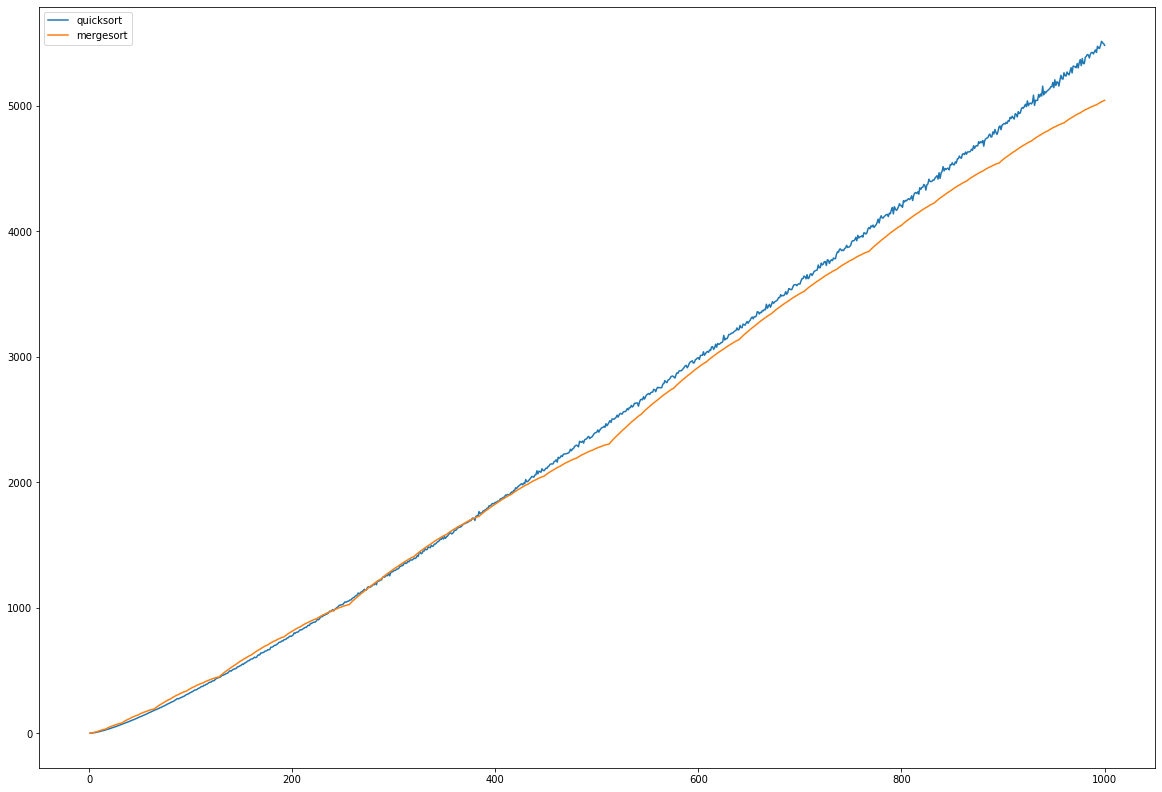

In [11]:
plt.rcParams["figure.figsize"] = (20 , 14)
plt.plot(x, q, label='quicksort')
plt.plot(x, m, label='mergesort')
plt.legend()